# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [167]:
ans1 = "According to the Materials and Methods section of the CRISP-DM-Bank study, the dataset represents the results of 17 direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. These campaigns involved telephone-based contacts offering long-term bank deposit products, and their combined results were aggregated into the dataset used for analysis"
print(ans1)

According to the Materials and Methods section of the CRISP-DM-Bank study, the dataset represents the results of 17 direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. These campaigns involved telephone-based contacts offering long-term bank deposit products, and their combined results were aggregated into the dataset used for analysis


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [169]:
import pandas as pd

In [170]:
bank_data = pd.read_csv(bank-full.csv", sep = ";")

In [171]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [173]:
#searching for missing values per UCI documentation
bank_data["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [174]:
#searching for missing values per UCI documentation
bank_data["contact"].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [175]:
#searching for missing values per UCI documentation
bank_data["pdays"].value_counts().head()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
Name: count, dtype: int64

In [176]:
#counting Nan/NA in data set
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [177]:
ans3 =""" Although the UCI dataset documentation indicates that some variables contain missing values, no missing values are present in the form of NaNs, as confirmed by isna().sum(). Instead, missing or unavailable information is encoded using explicit placeholder values, such as "unknown" in categorical variables and special numeric values (e.g., 999 in pdays) to indicate that a client was not previously contacted. These values represent semantic missingness rather than technical missingness and therefore do not require imputation, but must be handled appropriately during feature engineering"""
print(ans3)


 Although the UCI dataset documentation indicates that some variables contain missing values, no missing values are present in the form of NaNs, as confirmed by isna().sum(). Instead, missing or unavailable information is encoded using explicit placeholder values, such as "unknown" in categorical variables and special numeric values (e.g., 999 in pdays) to indicate that a client was not previously contacted. These values represent semantic missingness rather than technical missingness and therefore do not require imputation, but must be handled appropriately during feature engineering


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [179]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [180]:
ans4 = "The business objective of this task is to predict whether a bank client will subscribe to a term deposit based on demographic information, financial status, and details from previous marketing interactions. By accurately identifying clients who are more likely to subscribe, the bank can optimize its telephone marketing campaigns, reduce unnecessary outreach, and improve overall campaign efficiency and conversion rates"
print(ans4)

The business objective of this task is to predict whether a bank client will subscribe to a term deposit based on demographic information, financial status, and details from previous marketing interactions. By accurately identifying clients who are more likely to subscribe, the bank can optimize its telephone marketing campaigns, reduce unnecessary outreach, and improve overall campaign efficiency and conversion rates


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [182]:
# define and convert Target variable
y = (bank_data["y"] == "yes").astype(int)

# Features (exclude target and duration)
X = bank_data.drop(columns=["y", "duration"])


In [183]:
#creating numerical and categorical feature split
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_features, categorical_features


(Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'))

In [184]:
#encoding and transformation the features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)])

X_processed = preprocessor.fit_transform(X)
X_processed.shape



(45211, 50)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [186]:
#train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, #80/20 split stratification was applied to preserve the original class distribution of the target variable in both sets.
    random_state=42,
    stratify=y)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

0.8830181375801813
The baseline accuracy of approximately 88.3% represents the performance of a naive classifier that always predicts that a client will not subscribe to a term deposit. This high baseline reflects the class imbalance in the dataset. Any predictive model developed should exceed this baseline accuracy in order to demonstrate meaningful predictive value


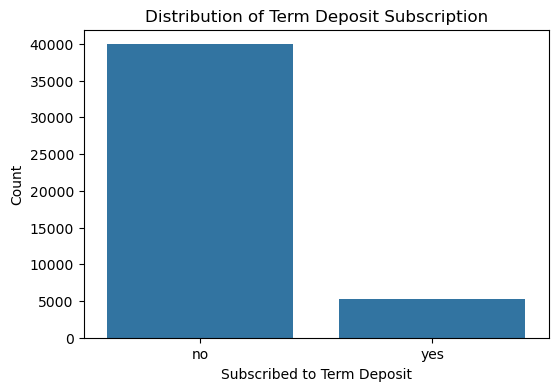

In [188]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(baseline_accuracy)
ans7 = "The baseline accuracy of approximately 88.3% represents the performance of a naive classifier that always predicts that a client will not subscribe to a term deposit. This high baseline reflects the class imbalance in the dataset. Any predictive model developed should exceed this baseline accuracy in order to demonstrate meaningful predictive value"
print(ans7)

#visualization of the baseline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="y", data=bank_data)
plt.title("Distribution of Term Deposit Subscription")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logistic_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

logistic_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

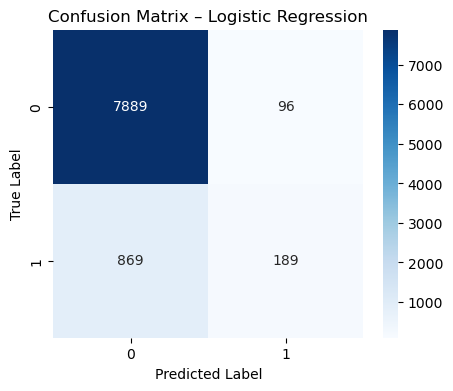

In [191]:
#Simple MOdel Logistic regresion plot
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

In [193]:
accuracy = logistic_model.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.3f}")

Test accuracy: 0.893


 "The Logistic Regression model achieves an accuracy of approximately 89.3% on the test dataset. This performance exceeds the baseline accuracy of approximately 88.3%, indicating that the model provides meaningful predictive value beyond simply predicting the majority class"

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [196]:
#import libraries
import time
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [197]:
#define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()}


In [198]:
#train data and evaluate performance
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)])

    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_acc = pipe.score(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)

    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 3),
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3)})

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression           0.205           0.892          0.893
1                  KNN           0.097           0.906          0.887
2        Decision Tree           0.658           1.000          0.831
3                  SVM         123.658           0.896          0.893


The comparison shows that both Logistic Regression and SVM achieve the highest test accuracy (approximately 0.893), exceeding the baseline model. However, SVM requires significantly longer training time, while Logistic Regression achieves comparable performance with substantially lower computational cost. The Decision Tree model exhibits clear overfitting, achieving perfect training accuracy but much lower test accuracy. Overall, Logistic Regression provides the best trade-off between performance, efficiency, and interpretability

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [201]:
#logistic regression
scoring_metric = "accuracy"

#adding GridSearch for logistic regression 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000))])

log_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"]}

log_search = GridSearchCV(
    log_pipe,log_grid,cv=5,scoring=scoring_metric,n_jobs=-1)

log_search.fit(X_train, y_train)

log_search.best_params_, log_search.best_score_



({'model__C': 0.1, 'model__penalty': 'l2'}, 0.8926399411721558)

In [202]:
#KNN + Gridseach


knn_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier())])

knn_grid = {
    "model__n_neighbors": [3, 5, 11, 25, 51],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2] } # 1=Manhattan, 2=Euclidean}

knn_search = GridSearchCV(knn_pipe,knn_grid,cv=5,scoring="accuracy",n_jobs=-1)

knn_search.fit(X_train, y_train)

print("KNN best params:", knn_search.best_params_)
print("KNN best CV accuracy:", round(knn_search.best_score_, 3))
print("KNN test accuracy:", round(knn_search.best_estimator_.score(X_test, y_test), 3))


KNN best params: {'model__n_neighbors': 25, 'model__p': 1, 'model__weights': 'distance'}
KNN best CV accuracy: 0.892
KNN test accuracy: 0.893


In [203]:
#Decission tree + GridSearch

tree_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))])

tree_grid = {
    "model__max_depth": [3, 5, 10, None],
    "model__min_samples_split": [2, 10, 50],
    "model__min_samples_leaf": [1, 5, 10]}

tree_search = GridSearchCV(tree_pipe,tree_grid,cv=5, scoring="accuracy", n_jobs=-1)

tree_search.fit(X_train, y_train)

print("Decision Tree best params:", tree_search.best_params_)
print("Decision Tree best CV accuracy:", round(tree_search.best_score_, 3))
print("Decision Tree test accuracy:", round(tree_search.best_estimator_.score(X_test, y_test), 3))


Decision Tree best params: {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Decision Tree best CV accuracy: 0.893
Decision Tree test accuracy: 0.893


In [204]:
#SVM + GridSearch
from sklearn.svm import SVC

svm_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", SVC())
])

svm_grid = {
    "model__kernel": ["linear", "rbf"],
    "model__C": [0.5, 1, 5]
}

svm_search = GridSearchCV(
    svm_pipe,
    svm_grid,
    cv=3,              # keep CV smaller for speed
    scoring="accuracy",
    n_jobs=-1
)

svm_search.fit(X_train, y_train)

print("SVM best params:", svm_search.best_params_)
print("SVM best CV accuracy:", round(svm_search.best_score_, 3))
print("SVM test accuracy:", round(svm_search.best_estimator_.score(X_test, y_test), 3))


SVM best params: {'model__C': 1, 'model__kernel': 'rbf'}
SVM best CV accuracy: 0.893
SVM test accuracy: 0.893


In [205]:


tuned_results = pd.DataFrame([
    {"Model": "KNN (tuned)", "CV Accuracy": knn_search.best_score_, "Test Accuracy": knn_search.best_estimator_.score(X_test, y_test)},
    {"Model": "Decision Tree (tuned)", "CV Accuracy": tree_search.best_score_, "Test Accuracy": tree_search.best_estimator_.score(X_test, y_test)},
    {"Model": "SVM (tuned)", "CV Accuracy": svm_search.best_score_, "Test Accuracy": svm_search.best_estimator_.score(X_test, y_test)},])

tuned_results[["CV Accuracy", "Test Accuracy"]] = tuned_results[["CV Accuracy", "Test Accuracy"]].round(3)
tuned_results.sort_values("Test Accuracy", ascending=False)


,Model,CV Accuracy,Test Accuracy
0,KNN (tuned),0.892,0.893
1,Decision Tree (tuned),0.893,0.893
2,SVM (tuned),0.893,0.893


In [206]:
#comparing before and after
default_acc = (results_df.set_index("Model")["Test Accuracy"].to_dict())

before_after_df = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Default Accuracy": default_acc["Logistic Regression"],
        "Tuned Accuracy": log_search.best_estimator_.score(X_test, y_test)},
    {
        "Model": "KNN",
        "Default Accuracy": default_acc["KNN"],
        "Tuned Accuracy": knn_search.best_estimator_.score(X_test, y_test)},
    {
        "Model": "Decision Tree",
        "Default Accuracy": default_acc["Decision Tree"],
        "Tuned Accuracy": tree_search.best_estimator_.score(X_test, y_test)},
    {
        "Model": "SVM",
        "Default Accuracy": default_acc["SVM"],
        "Tuned Accuracy": svm_search.best_estimator_.score(X_test, y_test)}])

before_after_df[["Default Accuracy", "Tuned Accuracy"]] = (
    before_after_df[["Default Accuracy", "Tuned Accuracy"]].round(3))

before_after_df

before_after_df["Accuracy Improvement"] = (
    before_after_df["Tuned Accuracy"] - before_after_df["Default Accuracy"]
).round(3)

before_after_df


,Model,Default Accuracy,Tuned Accuracy,Accuracy Improvement
0,Logistic Regression,0.893,0.893,0.000
1,KNN,0.887,0.893,0.006
2,Decision Tree,0.831,0.893,0.062
3,SVM,0.893,0.893,0.000


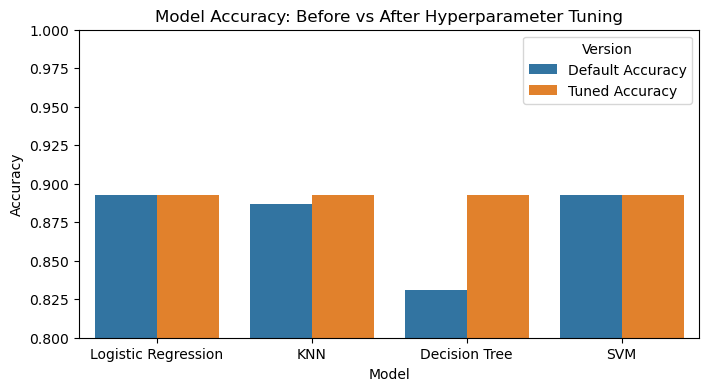

In [207]:
# plot of model comparison 
import seaborn as sns
import matplotlib.pyplot as plt

melted = before_after_df.melt(
    id_vars="Model",
    value_vars=["Default Accuracy", "Tuned Accuracy"],
    var_name="Version",
    value_name="Accuracy"
)

plt.figure(figsize=(8,4))
sns.barplot(data=melted, x="Model", y="Accuracy", hue="Version")
plt.title("Model Accuracy: Before vs After Hyperparameter Tuning")
plt.ylim(0.8, 1.0)
plt.show()


The before-and-after comparison shows that hyperparameter tuning results in modest accuracy improvements for KNN and substantial improvement for the Decision Tree model, which previously suffered from overfitting. Logistic Regression and SVM show no change in accuracy, indicating that their default configurations were already near-optimal for this dataset. Overall, tuning improves model robustness but confirms that Logistic Regression remains a strong and stable baseline performer

#Additional Evaluation Metrics (Recall and F1-Score)

Given the class imbalance in the dataset, accuracy alone may not fully capture model performance. Therefore, recall and F1-score are evaluated to better assess each model’s ability to correctly identify clients who subscribe to a term deposit.


In [260]:
#adding F1 and recall scores
from sklearn.metrics import recall_score, f1_score

models = {
    "Logistic Regression": log_search.best_estimator_,
    "KNN": knn_search.best_estimator_,
    "Decision Tree": tree_search.best_estimator_,
    "SVM": svm_search.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{name} - Recall: {recall:.3f}, F1-score: {f1:.3f}")


Logistic Regression - Recall: 0.171, F1-score: 0.273
KNN - Recall: 0.157, F1-score: 0.255
Decision Tree - Recall: 0.175, F1-score: 0.277
SVM - Recall: 0.185, F1-score: 0.289


In [262]:
from sklearn.metrics import recall_score, f1_score
import pandas as pd

final_results = []

models = {
    "Logistic Regression": log_search.best_estimator_,
    "KNN": knn_search.best_estimator_,
    "Decision Tree": tree_search.best_estimator_,
    "SVM": svm_search.best_estimator_
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    final_results.append({
        "Model": model_name,
        "Default Accuracy": default_acc[model_name],
        "Tuned Accuracy": model.score(X_test, y_test),
        "Accuracy Improvement": model.score(X_test, y_test) - default_acc[model_name],
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1 Score": f1_score(y_test, y_pred, pos_label=1)
    })

final_results_df = pd.DataFrame(final_results).round(3)
final_results_df


,Model,Default Accuracy,Tuned Accuracy,Accuracy Improvement,Recall,F1 Score
0,Logistic Regression,0.893,0.893,0.000,0.171,0.273
1,KNN,0.887,0.893,0.006,0.157,0.255
2,Decision Tree,0.831,0.893,0.062,0.175,0.277
3,SVM,0.893,0.893,0.000,0.185,0.289


##### Questions